# Alicja Misiuda
# 1.07.2024

In [1]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf

In [2]:
# Load in sounds
flute, sr_flute = librosa.load('flute.wav')
violin, sr_violin = librosa.load('violin.wav')
print(sr_flute, "sr_flute sampling rate")
print(sr_violin, "sr_violin sampling rate")

22050 sr_flute sampling rate
22050 sr_violin sampling rate


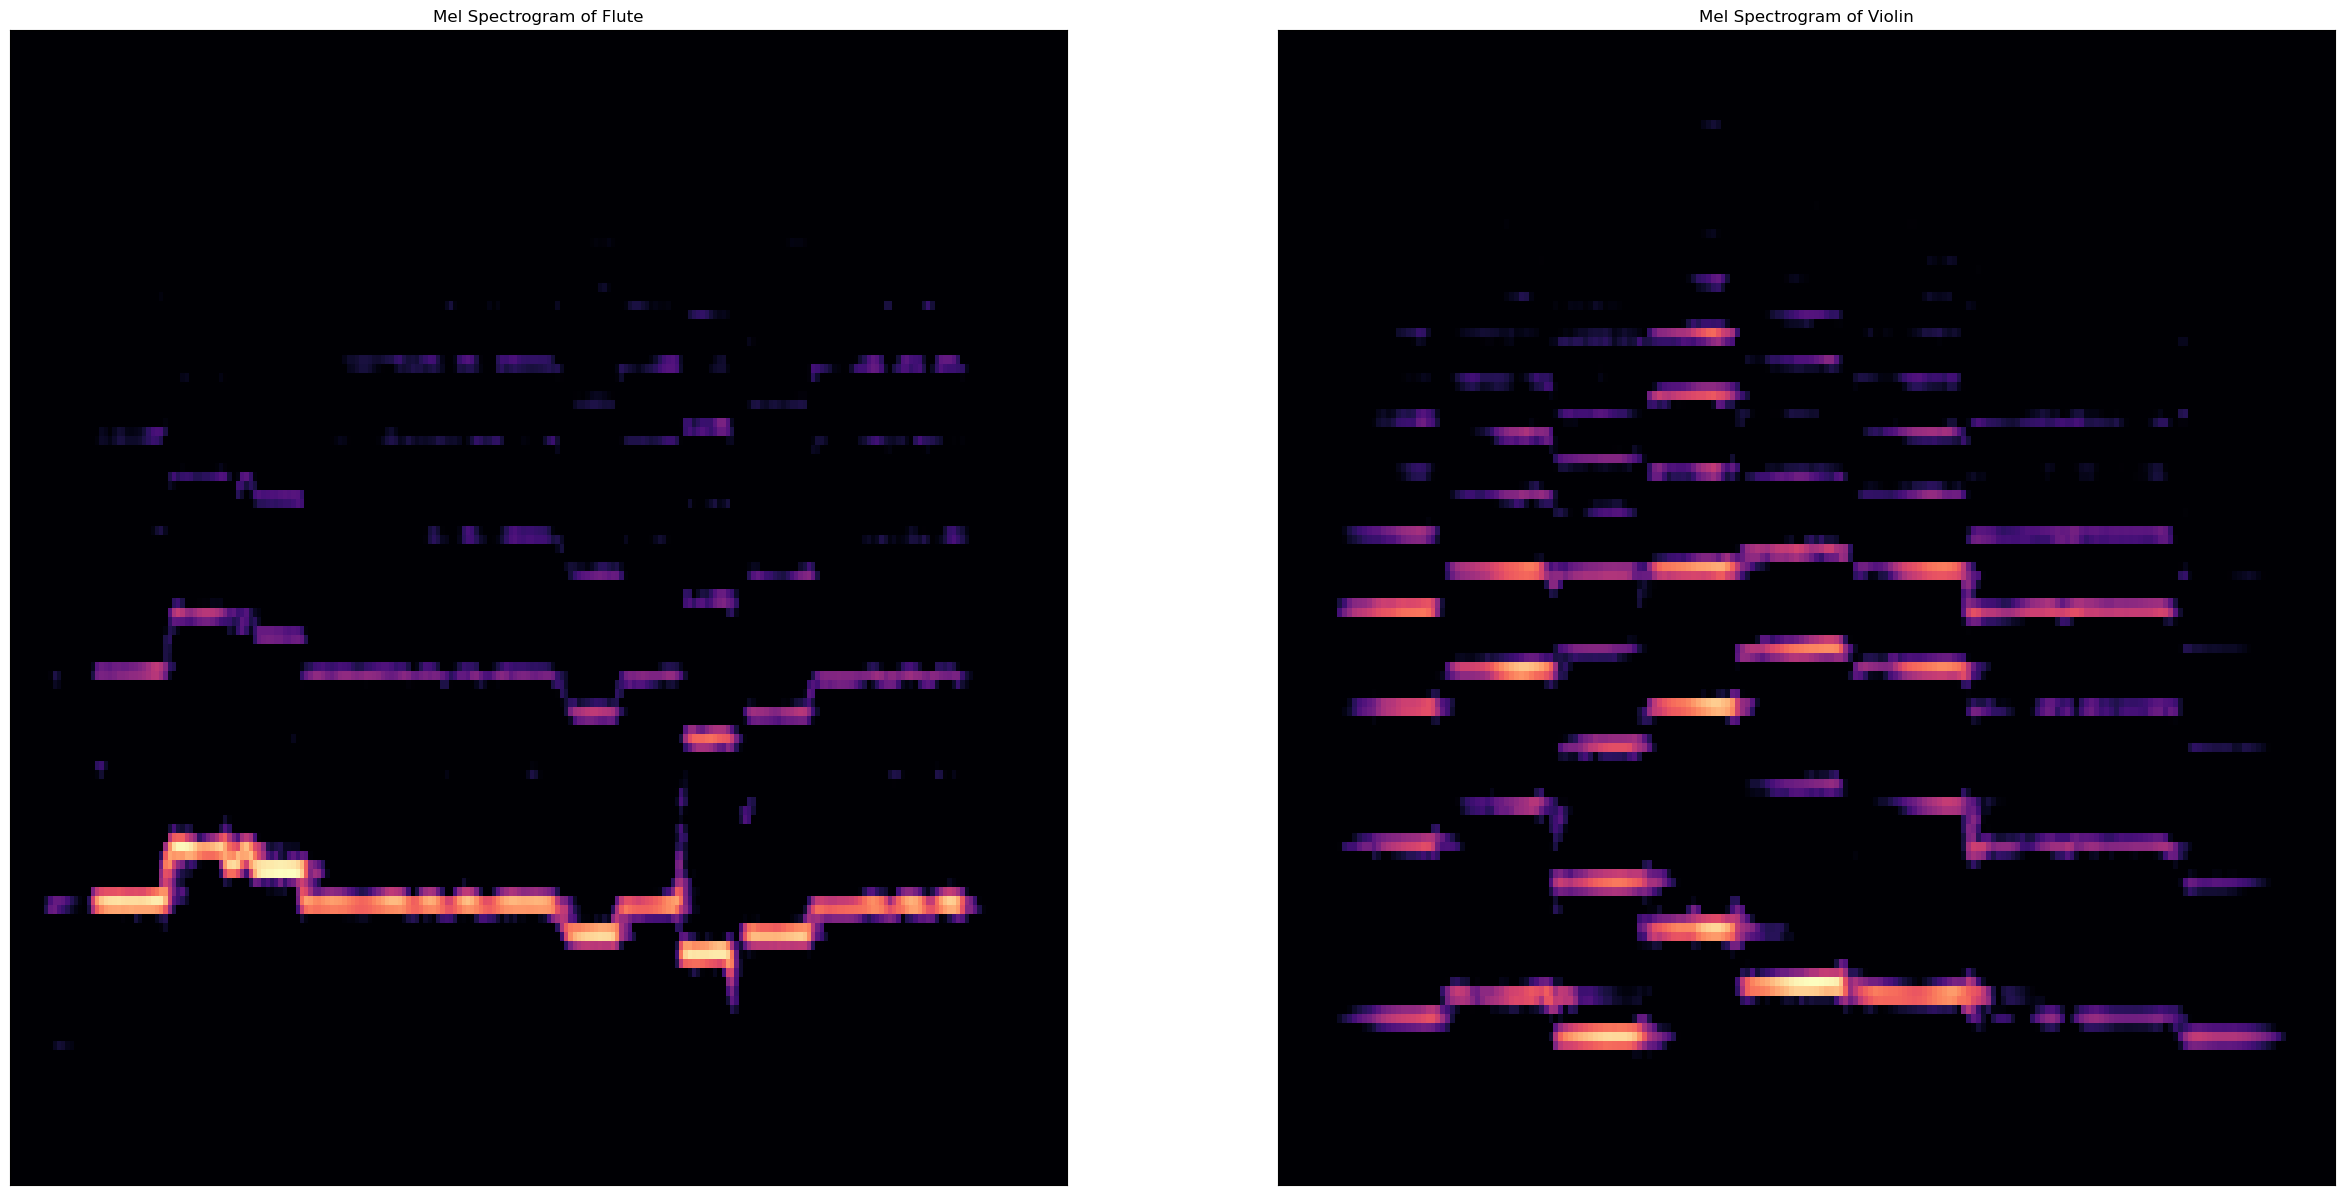

In [4]:
# Create Mel Spectrograms of sounds
fluteSpec = librosa.feature.melspectrogram(y=flute, sr=sr_flute)
violinSpec = librosa.feature.melspectrogram(y=violin, sr=sr_violin)

# Convert amplitudes to dB
fluteSpec = librosa.amplitude_to_db(fluteSpec)
violinSpec = librosa.amplitude_to_db(violinSpec)

# Plot mel spectrograms
fig, ax = plt.subplots(1,2, figsize = (30,15))
ax[0].set(title = 'Mel Spectrogram of Flute')
i = librosa.display.specshow(fluteSpec, ax=ax[0], cmap = 'magma')
ax[1].set(title = 'Mel Spectrogram of Violin')
librosa.display.specshow(violinSpec, ax=ax[1], cmap = 'magma')
#plt.colorbar(i)

In [10]:
# Compute Mel spectrogram
y, sr = librosa.load('flute.wav')
n_fft = 2048
hop_length = 512
mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)

# Compute Mel filterbank matrix
M = librosa.filters.mel(sr=sr, n_fft=n_fft)

# Inverse Mel scaling
inverse_mel_spectrogram = np.dot(np.linalg.pinv(M), mel_spectrogram)

# Inverse logarithmic compression (if mel_spectrogram is in dB)
linear_spectrogram = 10 ** (inverse_mel_spectrogram / 10)

# Optionally, reconstruct the signal using inverse STFT
reconstructed_signal = librosa.feature.inverse.mel_to_stft(linear_spectrogram, sr=sr, n_fft=n_fft)

output_filename = 'reconstructed_audio.wav'
# Write the reconstructed audio signal to a file using soundfile
sf.write(output_filename, reconstructed_signal, sr_flute)

/var/folders/wr/2r_dwymn3dz50cp09gzgn0d40000gn/T/ipykernel_14342/629598210.py:17: RuntimeWarning: overflow encountered in power
  linear_spectrogram = 10 ** (inverse_mel_spectrogram / 10)


In [13]:
# Compute Mel spectrogram
y, sr = librosa.load('flute.wav')
n_fft = 2048
hop_length = 512
mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=n_fft, hop_length=hop_length)

# Compute Mel filterbank matrix
M = librosa.filters.mel(sr=sr, n_fft=n_fft)

# Inverse Mel scaling
inverse_mel_spectrogram = np.dot(np.linalg.pinv(M), mel_spectrogram)

# Clip the inverse Mel spectrogram in log scale
inverse_mel_spectrogram_clipped = np.clip(inverse_mel_spectrogram, a_min=None, a_max=np.max(inverse_mel_spectrogram) - 10)

# Convert Mel spectrogram back to linear spectrogram
linear_spectrogram = np.exp(inverse_mel_spectrogram_clipped / 10)

# Optionally, reconstruct the signal using inverse STFT
reconstructed_signal = librosa.feature.inverse.mel_to_stft(linear_spectrogram, sr=sr, n_fft=n_fft)

# Write the reconstructed audio signal to a file using soundfile
output_filename = 'reconstructed_audio.wav'
sf.write(output_filename, reconstructed_signal, sr)


/var/folders/wr/2r_dwymn3dz50cp09gzgn0d40000gn/T/ipykernel_14342/2197958215.py:21: RuntimeWarning: overflow encountered in exp
  linear_spectrogram = np.exp(inverse_mel_spectrogram_clipped / 10)
